<a href="https://colab.research.google.com/github/MargaridaVitolo/Educ360/blob/main/Semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Atividade 1

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/vendas_loja.csv',sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         50 non-null     int64  
 1   Produto    50 non-null     object 
 2   Categoria  50 non-null     object 
 3   Regiao     49 non-null     object 
 4   Vendas     44 non-null     float64
 5   Mes        50 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB


In [127]:
# verificar nulos
df.isnull().sum()

,0
ID,0
Produto,0
Categoria,0
Regiao,1
Vendas,6
Mes,0


In [128]:
# preencher Região com 'Não informado
df['Regiao'] = df['Regiao'].fillna('Não Informado')

In [129]:
#preencher com a média a coluna de Vendas que esteja nula
# df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)
# código abaixo para eliminar o warning do inplace=True
# df['Vendas'] = df['Vendas'].fillna(df['Vendas'].mean())

# preencher com zeros
df['Vendas'] = df['Vendas'].fillna(0)
display(df.isnull().sum())

,0
ID,0
Produto,0
Categoria,0
Regiao,0
Vendas,0
Mes,0


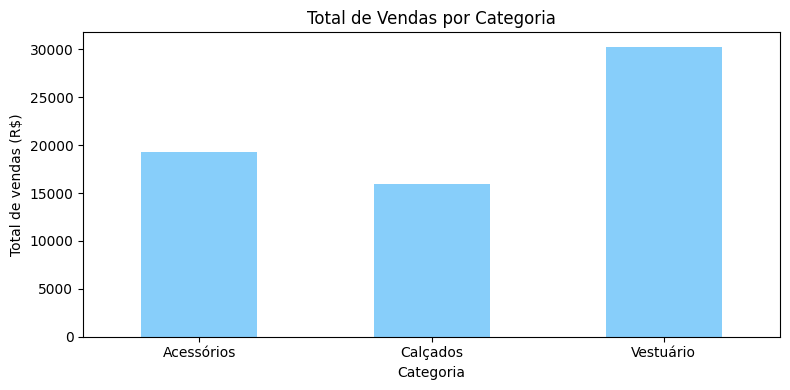

In [130]:
# gráfico de barras com o total de vendas por categoria

df.groupby('Categoria')['Vendas'].sum().plot(
    kind='bar',
    color='lightskyblue',
    figsize=(8,4),
    title='Total de Vendas por Categoria',
    xlabel='Categoria',
    ylabel='Total de vendas (R$)'
    )

plt.xticks(rotation=0) # label do eixo x na horizontal
plt.tight_layout()
plt.show()

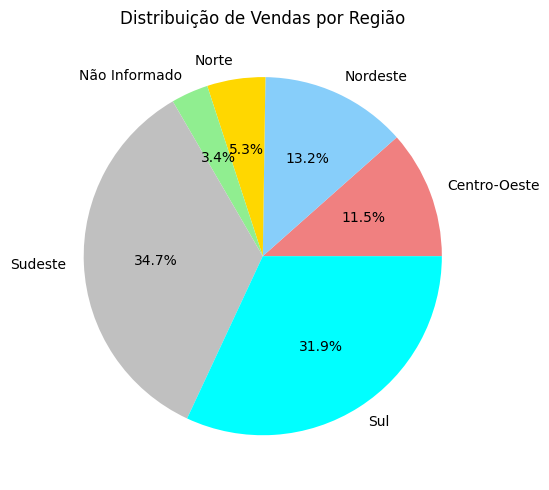

In [131]:
# gráfico de pizza com a distribuição de vendas por região
df.groupby('Regiao')['Vendas'].sum().plot(
    kind='pie',
    figsize=(8,5),
    title='Distribuição de Vendas por Região',
    ylabel= '',
    autopct='%1.1f%%',
    colors=['lightcoral', 'lightskyblue', 'gold', 'lightgreen', 'silver','cyan'] # Added a list of colors

)
plt.tight_layout()
plt.show()

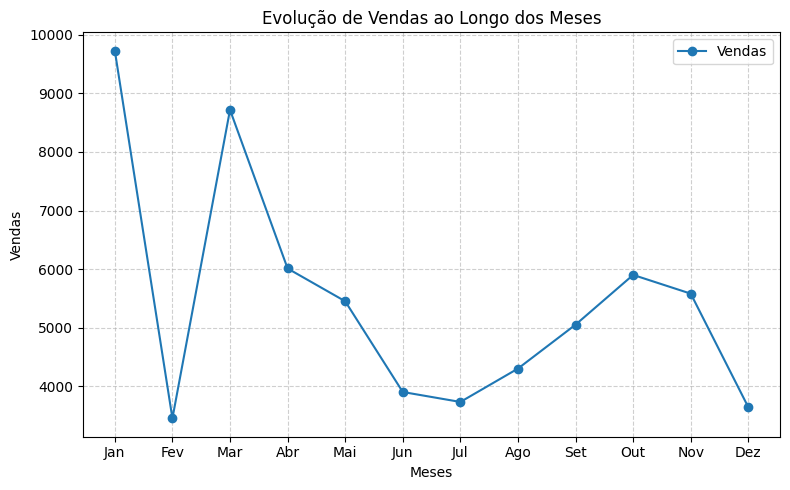

In [146]:
# gráfico de linhas com a evolução das vendas ao longo dos meses, com meses ordenados
# Define a ordem dos meses
import numpy as np
meses = np.arange(0, 12)  # números de 1 a 12 para os meses
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
#observed=False para eliminar o warning
ax=df.groupby('Mes',observed=False)['Vendas'].sum().sort_index().plot(
    kind='line',
    legend=True,
    figsize=(8,5),
    title='Evolução de Vendas ao Longo dos Meses',
    xlabel='Meses',
    ylabel='Vendas',
    marker='o'
)
ax.grid(True, linestyle='--', alpha=0.6) # Added grid
plt.xticks(meses, nomes_meses)
plt.tight_layout()
plt.show()



###Atividade 2

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/pacientes.csv',sep=',')
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       70 non-null     int64  
 1   Nome     70 non-null     object 
 2   Idade    70 non-null     int64  
 3   Genero   70 non-null     object 
 4   Peso     70 non-null     int64  
 5   Glicose  62 non-null     float64
 6   Pressao  65 non-null     float64
 7   Mes      70 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 4.5+ KB


In [134]:
# verificar nulos
df2.isnull().sum()

#valores nulos em glicose e pressao serão preenchidos com a média
# código abaixo para eliminar o warning do inplace=True
df2['Glicose'] = df2['Glicose'].fillna(df2['Glicose'].mean())
df2['Pressao'] = df2['Pressao'].fillna(df2['Pressao'].mean())

df2.isnull().sum()

,0
ID,0
Nome,0
Idade,0
Genero,0
Peso,0
Glicose,0
Pressao,0
Mes,0


In [135]:
def faixa_etaria(Idade):
    if Idade <= 30:
        return 'Até 30'
    elif Idade > 30 and Idade <= 40:
        return '31 - 40'
    elif Idade > 40 and Idade <= 50:
        return '41 - 50'
    elif Idade > 50 and Idade <= 60:
        return '51 - 60'
    else:
        return '60+'

In [137]:
glicose_idade=df2.groupby(df2['Idade'].apply(faixa_etaria))['Glicose'].mean()
print(glicose_idade)

Idade
31 - 40     93.958710
41 - 50    101.393888
51 - 60    108.096774
60+        109.580645
Até 30      86.400000
Name: Glicose, dtype: float64


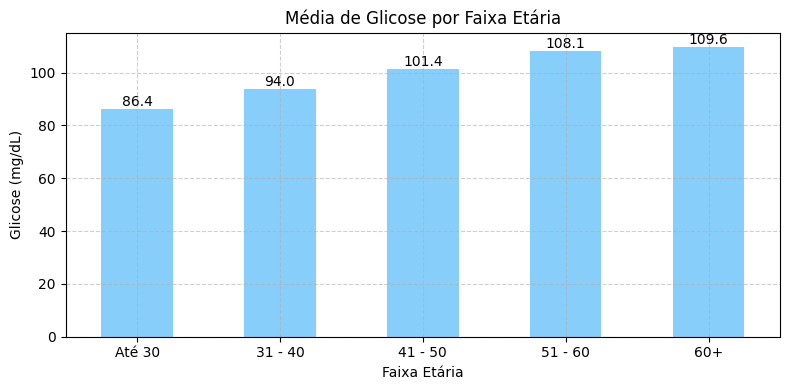

In [138]:
# gráfico de barras com a média de glicose por faixa etária
import numpy as np
#define a ordem do eixo x (de acordo com a idade)
fx_etaria_ordem = ['Até 30', '31 - 40', '41 - 50', '51 - 60', '60+']

# Reordenar usando a variável criada glicose_idade
glicose_idade = glicose_idade.reindex(fx_etaria_ordem)

ax=glicose_idade.plot(
    kind='bar',
    color='lightskyblue',
    figsize=(8,4),
    title='Média de Glicose por Faixa Etária',
    xlabel='Faixa Etária',
    ylabel='Glicose (mg/dL)'
    )

plt.xticks(rotation=0) # label do eixo x na horizontal
ax.grid(True, linestyle='--', alpha=0.6)
# apresentar o label com a média no topo de cada barra
for container in ax.containers:
  ax.bar_label(container,fmt='%.1f')
plt.tight_layout()
plt.show()




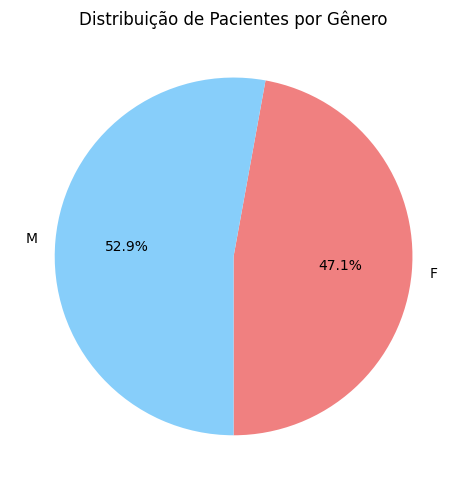

In [139]:
# gráfico de pizza com a proporção de pacientes por gênero
df2.groupby('Genero')['Genero'].count().plot(
    kind='pie',
    figsize=(8,5),
    title='Distribuição de Pacientes por Gênero',
    ylabel= '',
    autopct='%1.1f%%',
    colors=['lightcoral', 'lightskyblue'],
    startangle=270,
)
plt.tight_layout()
plt.show()


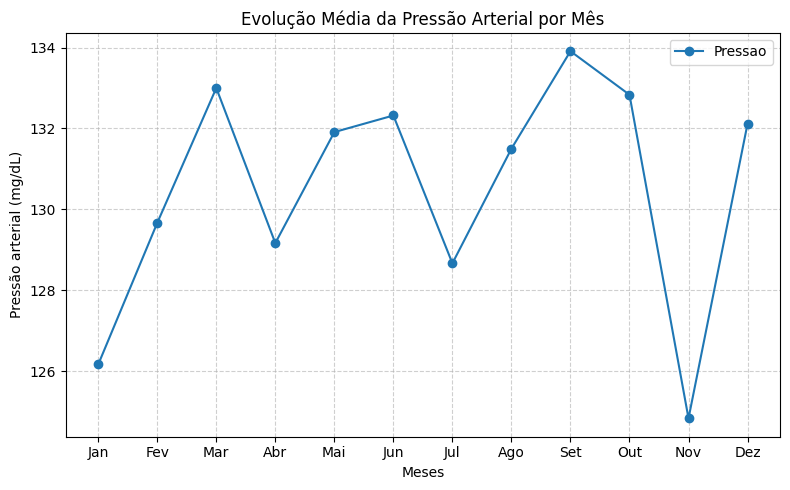

In [145]:
# Gráfico de linhas com a Evolução média da pressão arterial por mês
# Define a ordem dos meses
import numpy as np
meses = np.arange(0, 12)  # números de 1 a 12 para os meses
ordem_meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

# Transformar a coluna Mes em categoria ordenada
df2['Mes'] = pd.Categorical(df2['Mes'], categories=ordem_meses, ordered=True)

# observed=False para eliminar o warning
# Agrupar e somar as vendas por mês
df2_med_mes = df2.groupby('Mes', observed=False)['Pressao'].mean()
df2_med_mes = df2_med_mes.sort_index().reset_index()
#display(df2_med_mes)

# Ordenar pelo índice da categoria (a ordem dos meses)
df2_med_mes = df2_med_mes.sort_index()

ax=df2_med_mes.plot(
    kind='line',
    legend=True,
    figsize=(8,5),
    title='Evolução Média da Pressão Arterial por Mês',
    xlabel='Meses',
    ylabel='Pressão arterial (mg/dL)',
    marker='o'
)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xticks(meses, ordem_meses)
plt.show()

